# Model selection and  assessment

We discussed during class why it is appropriate to hold-out part of the data as a test dataset

$$ \hat{L} = \frac{1}{n_T} \sum_{(x,y)\in T} \ell(y, \hat{f}(x)), \quad \textit{TRAINING ERROR} $$

$$ \hat{L}_{HO} = \frac{1}{n_{HO}} \sum_{(x,y)\in HO} \ell(y, \hat{f}(x)), \quad \textit{HOLD-OUT ERROR} $$

with $\hat{f}$ being the solution of the training set $T$.

In actual applications, there are often two steps to solving a prediction problem: model selection and model assessment. In model selection we estimate the performance of various competing models with the hope of choosing the best one. Having chosen the final model, we assess the model by estimating the prediction error on new unseen data.

Class of models $\hat{f}_{\alpha}$: one should not use the test dataset for selecting $\alpha$. 

One could divide the data in three parts: 
- train;
- validation;
- (hold-out) test.

We use the training and validation data to select the best model and the test data to assess the chosen model.
The recipe is the following:

1.  We train all competing model on the train data and define the best model as the one that predicts best in the validation set.  We could re-split the train/validation data, do this many times, and select the method that, on average, performs the best.

2.  We chose the best model among many competitors, hence the observed performance will be a bit biased. Therefore, to appropriately assess performance on independent data we look at the score on the test set.


A common problem: when the amout of data is limited, the results from fitting a model to splitted data can be substantially different to fitting to the complete dataset. Indeed, when the number of samples is small (smaller than the number of variables) we do not have enough examples to approach the problem as described above. Thus, we need to perform a cross-validation procedure that returns a mean error score on the data.

## Exercise #1: Splitting Techniques

Given the California-housing dataset, use the following splitting methods:
- **K-fold** : split dataset into k consecutive folds. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
- **Monte Carlo** : randomly split the dataset into training and test sets(we need to specify the percentage of the test data points and an initial random state for reshuffling the data. We set `test_size = 0.2` and `random_state = 1`).
- **Leave One Out** : provides train/test indices to split data in train/test sets. Each sample is used once as a test set (singleton) while the remaining samples form the training set.

**Compute the mean and standard deviation at different splits for each feature and plot them. Use 5 splits for K-fold and MC. Comment on the results**

When performing data-splitting, you can refer to the classes in [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing()
df = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
target = cal_housing.target

In [26]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
#TODO
# (K-Fold)
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(df)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [86]:
df['MedInc'].std()

1.8998217179452688

In [109]:
it =1
Test_MedInc_Mean = []
Train_MedInc_Mean = []
Train_MedInc_Std = []
Test_MedInc_Std= []
for train_index, test_index in kf.split(df):
    print("Iteration Mean:", str(it), "TRAIN Mean:", df.iloc[train_index]['MedInc'].mean(), "TEST Mean:", df.iloc[test_index]['MedInc'].mean())
    print("Iteration Std:", str(it), "TRAIN Std:", df.iloc[train_index]['MedInc'].std(), "TEST Std:", df.iloc[test_index]['MedInc'].std())
    Train_MedInc_Mean.append(df.iloc[train_index]['MedInc'].mean())
    Test_MedInc_Mean.append(df.iloc[test_index]['MedInc'].mean())
    Train_MedInc_Std.append(df.iloc[train_index]['MedInc'].std())
    Test_MedInc_Std.append(df.iloc[test_index]['MedInc'].std())
    it = it+1

Iteration Mean: 1 TRAIN Mean: 3.9323571826550388 TEST Mean: 3.6239262839147286
Iteration Std: 1 TRAIN Std: 1.9140820313961735 TEST Std: 1.8211220717613654
Iteration Mean: 2 TRAIN Mean: 3.9404850472383717 TEST Mean: 3.591414825581395
Iteration Std: 2 TRAIN Std: 1.8904013287671548 TEST Std: 1.911946899654332
Iteration Mean: 3 TRAIN Mean: 3.7387253936531004 TEST Mean: 4.39845343992248
Iteration Std: 3 TRAIN Std: 1.8484660898925231 TEST Std: 2.0079946475783874
Iteration Mean: 4 TRAIN Mean: 3.9413360646802325 TEST Mean: 3.5880107558139533
Iteration Std: 4 TRAIN Std: 1.963072751414841 TEST Std: 1.5914760523749263
Iteration Mean: 5 TRAIN Mean: 3.8004513263081394 TEST Mean: 4.1515497093023255
Iteration Std: 5 TRAIN Std: 1.8716322600774675 TEST Std: 1.9841611383715547


In [142]:
def utility_func(df,column,fold):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=fold)
    

    it =1
    Test_Mean = []
    Train_Mean = []
    Train_Std = []
    Test_Std= []
    print(column)
    for train_index, test_index in kf.split(df):
        print("Iteration Mean:", str(it), "TRAIN Mean:", df.iloc[train_index][column].mean(), "TEST Mean:", df.iloc[test_index][column].mean())
        print("Iteration Std:", str(it), "TRAIN Std:", df.iloc[train_index][column].std(), "TEST Std:", df.iloc[test_index][column].std()) 
        Train_Mean.append(df.iloc[train_index][column].mean())
        Test_Mean.append(df.iloc[test_index][column].mean())
        Train_Std.append(df.iloc[train_index][column].std())
        Test_Std.append(df.iloc[test_index][column].std())
        it = it+1
    return  Train_Mean,Test_Mean,Train_Std,Test_Std

def plot_d(list_a,title,xlabel,ylabel):
    plt.plot(list_a)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

In [143]:
a = utility_func(df,"MedInc",5)

MedInc
Iteration Mean: 1 TRAIN Mean: 3.9323571826550388 TEST Mean: 3.6239262839147286
Iteration Std: 1 TRAIN Std: 1.9140820313961735 TEST Std: 1.8211220717613654
Iteration Mean: 2 TRAIN Mean: 3.9404850472383717 TEST Mean: 3.591414825581395
Iteration Std: 2 TRAIN Std: 1.8904013287671548 TEST Std: 1.911946899654332
Iteration Mean: 3 TRAIN Mean: 3.7387253936531004 TEST Mean: 4.39845343992248
Iteration Std: 3 TRAIN Std: 1.8484660898925231 TEST Std: 2.0079946475783874
Iteration Mean: 4 TRAIN Mean: 3.9413360646802325 TEST Mean: 3.5880107558139533
Iteration Std: 4 TRAIN Std: 1.963072751414841 TEST Std: 1.5914760523749263
Iteration Mean: 5 TRAIN Mean: 3.8004513263081394 TEST Mean: 4.1515497093023255
Iteration Std: 5 TRAIN Std: 1.8716322600774675 TEST Std: 1.9841611383715547


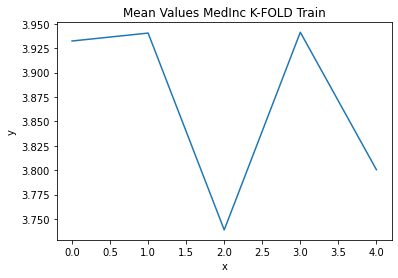

In [144]:
plot_d(a[0],"Mean Values MedInc K-FOLD Train","x","y")

In [141]:
a[0]

[3.9323571826550388,
 3.9404850472383717,
 3.7387253936531004,
 3.9413360646802325,
 3.8004513263081394]

Text(0, 0.5, 'Mean Values')

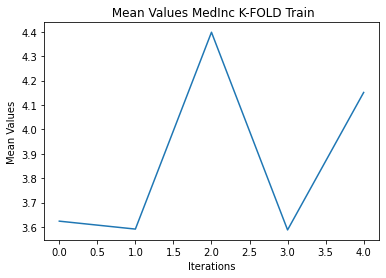

In [104]:
#Iteration 1 Mean Plots KFOLD
plt.plot(Test_MedInc_Mean)
plt.title(" Mean Values MedInc K-FOLD Train")
plt.xlabel("Iterations")
plt.ylabel("Mean Values")

Text(0, 0.5, 'Mean Values')

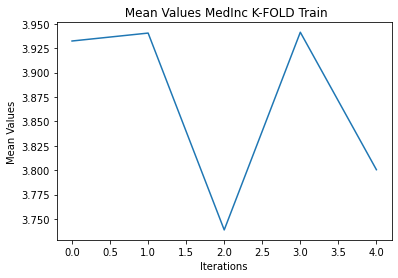

In [106]:
#Iteration 1 Mean Plots KFOLD
plt.plot(Train_MedInc_Mean)
plt.title(" Mean Values MedInc K-FOLD Train")
plt.xlabel("Iterations")
plt.ylabel("Mean Values")

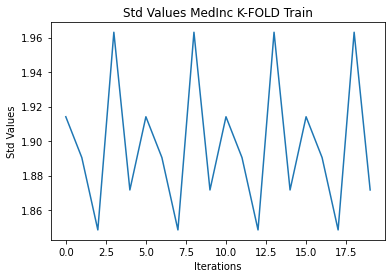

In [131]:
#Iteration Plots KFOLD
plt.plot(Train_MedInc_Std)
plt.title("Std Values MedInc K-FOLD Train")
plt.xlabel("Iterations")
plt.ylabel("Std Values")

def plot_d(list_a,title,xlabel,ylabel):
    plt.plot(Train_MedInc_Std)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylable(ylabel)
    

Text(0, 0.5, 'Std Values')

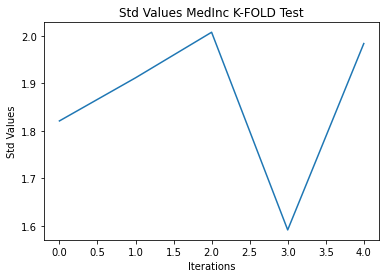

In [108]:
#Iteration Plots KFOLD Std
plt.plot(Test_MedInc_Std)
plt.title("Std Values MedInc K-FOLD Test")
plt.xlabel("Iterations")
plt.ylabel("Std Values")

In [34]:
for train_index, test_index in kf.split(target):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 4128  4129  4130 ... 20637 20638 20639] TEST: [   0    1    2 ... 4125 4126 4127]
TRAIN: [    0     1     2 ... 20637 20638 20639] TEST: [4128 4129 4130 ... 8253 8254 8255]
TRAIN: [    0     1     2 ... 20637 20638 20639] TEST: [ 8256  8257  8258 ... 12381 12382 12383]
TRAIN: [    0     1     2 ... 20637 20638 20639] TEST: [12384 12385 12386 ... 16509 16510 16511]
TRAIN: [    0     1     2 ... 16509 16510 16511] TEST: [16512 16513 16514 ... 20637 20638 20639]


In [35]:
for train_index, test_index in kf.split(df):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 4128  4129  4130 ... 20637 20638 20639] TEST: [   0    1    2 ... 4125 4126 4127]
TRAIN: [    0     1     2 ... 20637 20638 20639] TEST: [4128 4129 4130 ... 8253 8254 8255]
TRAIN: [    0     1     2 ... 20637 20638 20639] TEST: [ 8256  8257  8258 ... 12381 12382 12383]
TRAIN: [    0     1     2 ... 20637 20638 20639] TEST: [12384 12385 12386 ... 16509 16510 16511]
TRAIN: [    0     1     2 ... 16509 16510 16511] TEST: [16512 16513 16514 ... 20637 20638 20639]


In [36]:
#Monte Carlo split
from sklearn.model_selection import ShuffleSplit
MonteCarloSplit = ShuffleSplit(n_splits=5, test_size=.2, random_state=1)
MonteCarloSplit.get_n_splits(df,target)

5

In [38]:
# Leave one Out 
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(df)

20640

### Imputation Using (Mean/Median) Values:
Many real-world datasets may contain missing values for various reasons.
Training a model with a dataset that has a lot of missing values can drastically impact the model’s quality.
One way to handle this problem is to get rid of the observations that have missing data. However, you will risk losing data points with valuable information. A better strategy would be to impute the missing values.


One strategy of imputing is to compute the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others.

**Among the previous strategies of splitting, which one would you suggest to use for imputing missing data? Motivate your answer.**

In [17]:
# TODO
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

## Excercise #2: Cross-validation


Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set `X_test`, `y_test`.

When evaluating different settings for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a validation set: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called **cross-validation**. A test set should still be held out for final evaluation, but a fixed validation set is no longer needed when doing CV and the model sees all the data (minus the test set). Cross-validation can be iteratively performed adopting different splitting techniques. For example, in `K-Fold CV`, the training set is split into K smaller sets. This procedure is followed for each of the K “folds”:
- A model is trained using K-1 folds as training data;
- the resulting model is validated on the remaining part of the data (using some performance measure, such as accuracy).

The performance measure reported by K-Fold cross-validation is then the average of the values computed in the loop.

Below a schamatic representation of 5-Fold cross-validation.


<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="550" height="400" />



**Generate a labelled dataset for binary calssification using [sklearn.datasets.make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) with 600 samples, 2 classes and 200 features, use as classificator [sklearn.linear_model.RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier) and look for the regularization parameters in the interval $[10^{-5}, 10^{15}]$ using different splitting schemes. Hold out a test set and compare performances of different models.**

In [18]:
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification

In [19]:
X, y = make_classification(n_samples=600, n_features=200, flip_y=0.05, class_sep=0.6)

In [ ]:
# TODO

**Repeat the previous procedure using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and compare the selected parameters**

In [ ]:
# TODO

## Exercise #3: Unbalanced classes

When dealing with unbalanced classes, caution must be used when splitting data into train/validation/test.

**Can you guess why?**

In [ ]:
# TODO

**Use both Ridge Classifier and Logistic Regression for classification on the dataset** [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud). 

The dataset contains transactions made by credit cards in September 2013 by european cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We further select the number of non-fraudulent transations so that the imbalance is less severe and the ratio is 5%.

**Make use of KFold and StratifiedKFold techniques for splitting data and two different scores during training/validation : `accuracy` and `balanced accuracy`.**

The `accuracy` in binary classification is defined as 

$$\dfrac{TN+TP}{TN+TP+FP+FN}$$ 

it quantifies the proportion of true results among the total number of cases examined. While the `balanced accuracy` is defined as:

$$\frac{1}{2}\,\bigg{[}\dfrac{TP}{TP+FN}+\dfrac{TN}{TN+FP}\bigg{]}$$

which is the average of recall obtained on each class.

**What can you conclude by the comparison of the trained models performances? Motivate your answer**

In [ ]:
credit = pd.read_csv('creditcard.csv')
credit.head()

In [ ]:
credit.Class.value_counts()

In [ ]:
X = credit.drop(['Time','Class'],axis = 1).values
y = credit['Class'].values

In [ ]:
np.random.seed(42)
pos_ind = np.where(y==1)[0]
neg_ind = np.random.choice(np.where(y==0)[0],9840,replace = False)
ind = np.sort(np.hstack((pos_ind,neg_ind)))

In [ ]:
X = X[ind,:]
y = y[ind]

In [ ]:
X.shape,y.shape

In [ ]:
# TODO

**Extra: can you think about other strategies to deal with unbalanced datasets?**

In [ ]:
# TODO